#**Limpieza de Datos: FITME**
	04 de diciembre - 2025

* Paulina Almada Martínez (A01710029)
* Mauricio Benavente Revuelta (A01705898)
* Sol Venecia Ramos Vallejo (A01066646)
* Daniela Isabel Tapia Martínez (A01710768)

##**Introducción**

Las fuentes de información primarias utilizadas durante los análisis realizados fueron los siguientes conjuntos de datos que recibimos de parte del socio formador. Está compuesto de cinco bases de datos en Excel:

**Reportes de combustible**:

Estos archivos contienen reportes detallados de consumo de combustible para el cliente “LOGISTICA DEL MAYAB SA DE CV". La estructura es idéntica en todos, variando solo el periodo reportado.

- Agosto Combustible: contiene registros referentes al consumo de combustible en los viajes de Agosto de 2025.
- Enero-Febrero 2025 Combustible: contiene registros referentes al consumo de combustible en los viajes de Enero-Febrero de 2025.
- Septiembre 2025 Combustible: contiene registros referentes al consumo de combustible en los viajes de Septiembre de 2025.

**Reportes de peajes**:

Estos archivos contienen registros detallados de los cruces por casetas realizados por las unidades del cliente “LOGÍSTICA DEL MAYAB SA DE CV”. La estructura es consistente entre los archivos, variando únicamente el periodo reportado.

- Peajes: contiene registros referentes a los cruces de casetas realizados en el periodo del 01/01/2025 al 19/09/2025.
Reportes de telemetría:

**Reportes de telemetría**:

Estos archivos contienen información detallada sobre el comportamiento operativo de las unidades de la flota “LOGÍSTICA DEL MAYAB SA DE CV”. La estructura es consistente entre los reportes, variando únicamente el periodo reportado.

- Telemetría – Report: contiene métricas operativas correspondientes al periodo del 1 de Enero 2024 hasta el 31 de Agosto 2025. Se enfoca en mostrar el desempeño operacional de cada unidad a nivel mensual, con énfasis en la eficiencia del uso del vehículo.
- Telemetría – Summary: contiene un resumen consolidado del periodo del 1 de Enero 2024 hasta el 31 de Agosto 2025. Se presenta una visión consolidada del comportamiento de la flota, ofreciendo un panorama general por unidad.

**Reporte Listado Viajes**:

Estos archivos contienen el listado detallado de viajes realizados por la flota del cliente “LOGISTICA DEL MAYAB SA DE CV”. La estructura es idéntica en todos, variando solo el periodo reportado.

- Enero–Octubre 2025 — Reporte Listado Viajes : contiene registros referentes a los viajes realizados entre Enero-Octubre de 2025.

##**1. Documentación de los Datos**

###**Evaluación de Datos**

####**Calidad de los datos**

**`Enero–Octubre 2025 — Reporte Listado Viajes`**

El análisis muestra que la base contiene una gran cantidad de viajes con una estructura útil para entender la operación; sin embargo, presenta problemas que impiden utilizarla para construir modelos confiables.

1. **Costos con montos en cero o valores irreales**
   
   Existen muchos viajes donde el costo aparece en cero o extremadamente bajo. Esto puede deberse a viajes internos, cancelados, ajustes administrativos o errores de captura.

- **Por qué importa**: estos registros distorsionan cualquier cálculo de costo promedio, margen o eficiencia, y deben depurarse antes de modelar.

2. **Falta de información clave (peso y tiempos)**

   Una proporción importante de viajes no tiene peso registrado, y en otros casos faltan fechas u horas de salida o llegada.

- **Por qué importa**: sin peso no se pueden analizar rendimientos ni costos reales; sin tiempos no se puede calcular duración del viaje, puntualidad ni desempeño operativo.

3. **Sin información de mantenimiento**

   La base no incluye historial de mantenimiento.

- **Por qué importa**: esto genera un punto ciego al intentar relacionar fallas, disponibilidad o consumo con el estado de las unidades.


**`Peajes`**

La base de peajes es sólida. Mantiene gran parte de sus campos completos.

1. **No hay duplicados y las variables críticas están completas**

   Importe, fecha, hora y caseta vienen bien registrados.

- **Por qué importa:** permite analizar patrones de gasto sin problemas de consistencia.

2. **Algunos campos administrativos faltantes**

   “Fecha de Aplicación” y “Hora de Aplicación” presentan vacíos.

- **Por qué importa:** no afectan el análisis central, pero sugieren procesos administrativos no cerrados.

3. **Columnas completamente vacías**

   Ej. Fecha Aplicación, Hora Aplicación y Consecar.

- **Por qué importa:** pueden eliminarse sin afectar el análisis.

4. **Casos aislados de importes en cero**

   Son pocos pero deben revisarse.

- **Por qué importa:** aseguran que no sea un error o una excepción operativa relevante.

5. **Valores financieros guardados como texto**

   Algunos valores financieros vienen como texto con signos como “$”.

- **Por qué importa:** requieren limpieza antes de hacer cálculos.


**`Telemetría - Report`**

La base está completa en todas sus columnas principales, pero muestra inconsistencias operativas que deben corregirse.

1. **Distancia > 0 pero velocidad máxima = 0**

   Aparecen 32 casos así.

- **Por qué importa**: es un comportamiento imposible y señala fallas del sensor o captura.

2. **Filas duplicadas**

   Se encontraron 9 duplicados.

- **Por qué importa**: inflan conteos de kilómetros y eventos por unidad.

3. **Velocidades máximas irreales (hasta 253 km/h)**

   No corresponden al desempeño real de un vehículo de carga.

- **Por qué importa**: deben eliminarse o corregirse para análisis de desempeño.

4. **No incluye información económica**

   No hay datos de combustible, peajes o mantenimiento.

- **Por qué importa**: la base solo describe operación física, pero no permite conectar comportamiento con costo.


**`Telemetría - Summary`**

Este archivo tiene un formato estilo “reporte de Excel”, no una base analítica, y esto genera problemas estructurales.

1. **El nombre del vehículo aparece solo en la primera fila de cada bloque**

   El 90% de filas tiene la columna “Nombre” vacía, aunque pertenecen al mismo vehículo.

- **Por qué importa**: requiere llenado previo para poder agrupar y analizar.

2. **Filas de totales que suman columnas que no deberían sumarse.**

   Esto crea valores imposibles como velocidades máximas de miles de km/h.

- **Por qué importa**: estas filas deben eliminarse por completo; no representan datos reales.

3. **Mezcla datos reales con datos agregados inflados.**

   El archivo combina detalle mensual con totales mal construidos.

- **Por qué importa**: si no se limpia, los indicadores quedan completamente distorsionados.

4. **Incorpora variables relevantes de cliente, conductor y productividad**

   Duración en cliente, tiempo en casa, paradas, distancia total.

- **Por qué importa**: estas variables permiten evaluar servicio, bienestar y uso de la flota, dimensiones que no aparecen en el archivo “Reporte”.


**`Combustible`**

Se generó una base de dtaos en conjunto con todas las bases de datos de combustible: Agosto Combustible, Enero-Febrero 2025, Septiembre 2025.

1. **Formato consistente con campos clave completos.**

   Id Vehículo, Fecha, Importe, Km Transacción vienen bien.

- **Por qué importa**: facilita cálculo de consumo y costo por unidad.

2. **Registros duplicados en ambas bases.**

   Vehículo T454 y T533 con transacciones repetidas.

- **Por qué importa**: duplicados inflan costos y litros consumidos.

3. **Campos vacíos en Región o Centro Costos (septiembre)**

   Algunos registros carecen de información geográfica.

- **Por qué importa**: afecta análisis por zona o sucursal.

4. **Rendimientos irreales (0.001 km/l o nulos)**

   Aparecen valores que no corresponden a un comportamiento real.   

- **Por qué importa**: estos valores distorsionan cualquier análisis de consumo, rendimiento o eficiencia.

####**Variables críticas**

**Reporte Listado de Viajes Ene–Oct 2025**



`Variables críticas Reporte Listado de Viajes Ene-Oct 2025`

Estas generan impacto directo en la operación y en el costo del viaje:
* Ruta: Define el trayecto específico del viaje. Es una de las variables más relevantes, pues cada ruta tiene una estructura de costos distinta (peajes, distancias, riesgos, disponibilidad de operadores, etc.).
* Nombre Cliente: Permite identificar acuerdos comerciales, tarifas diferenciadas, prioridades y frecuencias de viaje. Es clave para evaluar rentabilidad por cliente.
* Peso Kgs / Peso Descarga Kgs / Diferencia: El peso es un determinante directo del consumo de combustible, desgaste mecánico y tarifa del flete.
La “Diferencia” entre peso de carga y descarga también ayuda a validar la precisión de los registros.
* SubTotal / IVA / Retención / Total: Son variables esenciales para analizar los costos facturados y comparar precios entre clientes o rutas.
SubTotal funciona como la variable objetivo más estable para modelos predictivos de costos.
* Fecha / Fecha Salida / Fecha Llegada:cPermiten medir tiempos de ciclo, puntualidad, tendencia temporal en precios, estacionalidad de demanda y eficiencia operativa.
* Operador: Importante para identificar patrones de manejo, eficiencia, tiempos de entrega y posibles sesgos operativos.
* Tractocamión / Remolques: Ayudan a analizar rendimiento por unidad, disponibilidad de equipo y costos indirectos asociados.

`Variables críticas Peajes`

 * Importe:Es la variable financiera principal. Permite analizar el gasto total en peajes y detectar desviaciones presupuestale
 * Caseta:Variable crítica para identificar las rutas más costosas o frecuentes. Aunque no indica "Distancia" explícita, sirve como proxy para determinar el trayecto.
 * Clase: Indica el tipo de unidad (ejes). Es fundamental para validar que se esté cobrando la tarifa correcta según el vehículo asignado.
 * Fecha/hora: Esenciales para identificar patrones de tráfico, horarios pico y tiempos de tránsito entre casetas.
 * No.Economico: Permite rastrear el gasto específico por unidad (camión) y evaluar la eficiencia individual de la flota.

 `Variables críticas Telemetría - Reporte`

 En este archivo, las variables clave para la operación son:
* Eficiencia Operativa: Distancia, Duración de conducción, Porcentaje de tiempo en conducción.
* Comportamiento/Seguridad: Velocidad máxima (indica riesgos), Tiempo en ralentí (indica desperdicio de combustible).
* Temporalidad: Fecha de inicio y Fecha de fin del periodo (permite análisis de tendencias mensuales).

`Variables críticas Telemtría - Summary`

Este archivo contiene variables adicionales enfocadas en la interacción con el cliente que no están en el Reporte:

* Servicio al Cliente: Duración del cliente, Paradas en los clientes (Frecuencia de visita), Tiempo fuera del cliente.
* Bienestar del Conductor: Duración en Casa.
* Productividad: Distancia total acumulada.

`Variables críticas Combustible`

Para un análisis robusto de "Combustible", las siguientes variables extraídas de sus bases son fundamentales:

*Distancia y Eficiencia:*
* Km Transacción y Recorrido: Críticos para calcular el rendimiento real.
* Rendimiento Real vs Rendimiento Vehículo: Comparativa esencial para detectar ineficiencias mecánicas o de conducción.
* Costos Operativos: Importe Transacción: El costo total por carga es la variable financiera principal.
* Precio Unitario Merc: Permite monitorear las fluctuaciones del costo del combustible por litro.

*Contexto de Operación:*

* Estación de Servicio y Ciudad/Estado: Permiten identificar puntos de carga estratégicos o costosos.
* Tipo Transacción (ej. ONLINE): Ayuda a validar la veracidad y método de la operación.

*Activos:*
* Id Vehículo (ej. T410, T454): Permite el seguimiento individual del desempeño de la flota.

##**2. Limpieza de Datos**

###**Montaje de los DataFrames**

In [102]:
import pandas as pd

In [103]:
enfeb_combustible = pd.read_excel('Enero-febrero 2025 Combustible.xlsx', sheet_name='CONSULTA DE MOVIMIENTOS (CLIENT', header=7)

In [104]:
ag_combustible = pd.read_excel('Agosto Combustible.xlsx', sheet_name='CONSULTA DE MOVIMIENTOS (CLIENT', header=7)

In [105]:
sept_combustible = pd.read_excel('Septiembre 2025 Combustible.xlsx', sheet_name='CONSULTA DE MOVIMIENTOS (CLIENT', header=7)

In [106]:
peajes = pd.read_csv('Peajes.csv')

In [107]:
telemetria_report = pd.read_excel('Telemetría.xlsx', sheet_name='Report')

In [108]:
telemetria_summary = pd.read_excel('Telemetría.xlsx', sheet_name='Summary', header=12)

In [109]:
# Poner el nombre de la última unidad encontrada
telemetria_summary['Nombre'] = telemetria_summary['Nombre'].ffill()

# Borrar columnas de resumen
telemetria_summary = telemetria_summary[~telemetria_summary['Nombre'].astype(str).str.contains('Total', case=False, na=False)]

In [110]:
viajes = pd.read_excel('Reporte Listado Viajes Ene-Oct\'25.xlsx')

###**Limpieza de los Datos**

#### **Manejo de Nulos**

In [111]:
# Límite máximo permitido de valores vacíos
limite_vacios = 0.65

#Calcular el porcentaje de valores vacíos por columna
porcentaje_vacios = enfeb_combustible.isna().mean()

#Identificar las columnas que se pasan del límite
quitar_columnas = porcentaje_vacios[porcentaje_vacios > limite_vacios].index

# Mostrar cuántas columnas hay antes de quitar
print("Columnas antes de quitar:", enfeb_combustible.shape[1])

#Quitar las columnas con demasiados vacíos
enfeb_combustible = enfeb_combustible.drop(columns=quitar_columnas)

#Resultados finales
print("Columnas quitadas:", list(quitar_columnas))
print("Columnas después de quitar:", enfeb_combustible.shape[1])


Columnas antes de quitar: 48
Columnas quitadas: ['No Comprobante', 'Ticket de Bomba', 'Km Ant Transacción', 'Recorrido', 'Rendimiento Vehículo', 'Capacidad de Tanque', 'Saldo Ant Transacción', 'Saldo Actual Después de Transacción', 'TAR', 'Monto descuento', 'Tipo Tarjeta', 'Observaciones', 'Parámetro Personalizado1', 'Parámetro Personalizado2', 'Parámetro Personalizado3', 'Parámetro Personalizado4\n', 'Parámetro Personalizado5']
Columnas después de quitar: 31


<Axes: >

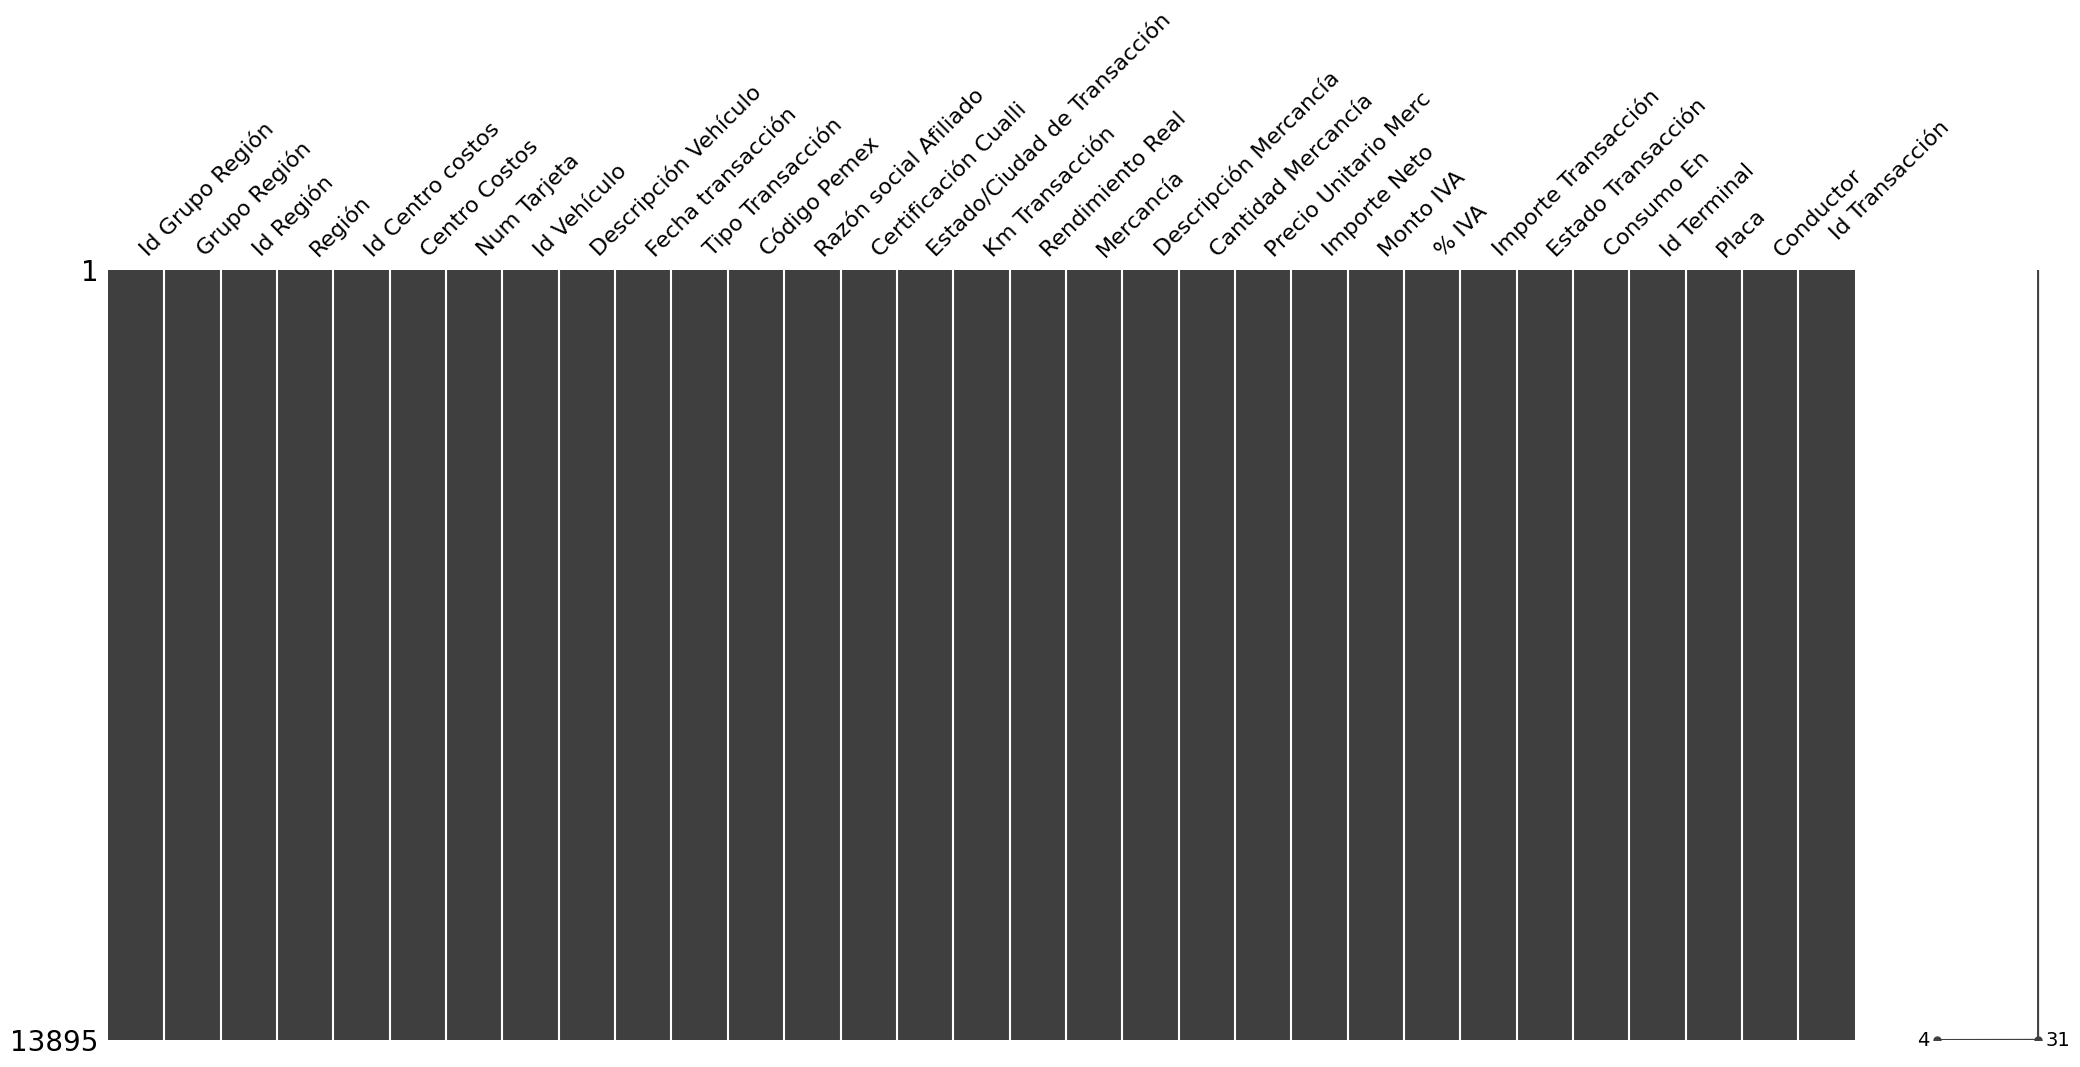

In [112]:
import missingno as msno

msno.matrix(enfeb_combustible)

Eliminamos las columnas que tuvieran más del 65% de valores nulos, ya que no contenían información tan relevante para el análisis que deseamos realizar.

In [113]:
# Límite máximo permitido de valores vacíos
limite_vacios = 0.65

#Calcular el porcentaje de valores vacíos por columna
porcentaje_vacios = ag_combustible.isna().mean()

#Identificar las columnas que se pasan del límite
quitar_columnas = porcentaje_vacios[porcentaje_vacios > limite_vacios].index

# Mostrar cuántas columnas hay antes de quitar
print("Columnas antes de quitar:", ag_combustible.shape[1])

#Quitar las columnas con demasiados vacíos
ag_combustible = ag_combustible.drop(columns=quitar_columnas)

#Resultados finales
print("Columnas quitadas:", list(quitar_columnas))
print("Columnas después de quitar:", ag_combustible.shape[1])

Columnas antes de quitar: 48
Columnas quitadas: ['No Comprobante', 'Ticket de Bomba', 'Km Ant Transacción', 'Recorrido', 'Rendimiento Vehículo', 'Capacidad de Tanque', 'Saldo Ant Transacción', 'Saldo Actual Después de Transacción', 'TAR', 'Monto descuento', 'Tipo Tarjeta', 'Observaciones', 'Parámetro Personalizado1', 'Parámetro Personalizado2', 'Parámetro Personalizado3', 'Parámetro Personalizado4\n', 'Parámetro Personalizado5']
Columnas después de quitar: 31


<Axes: >

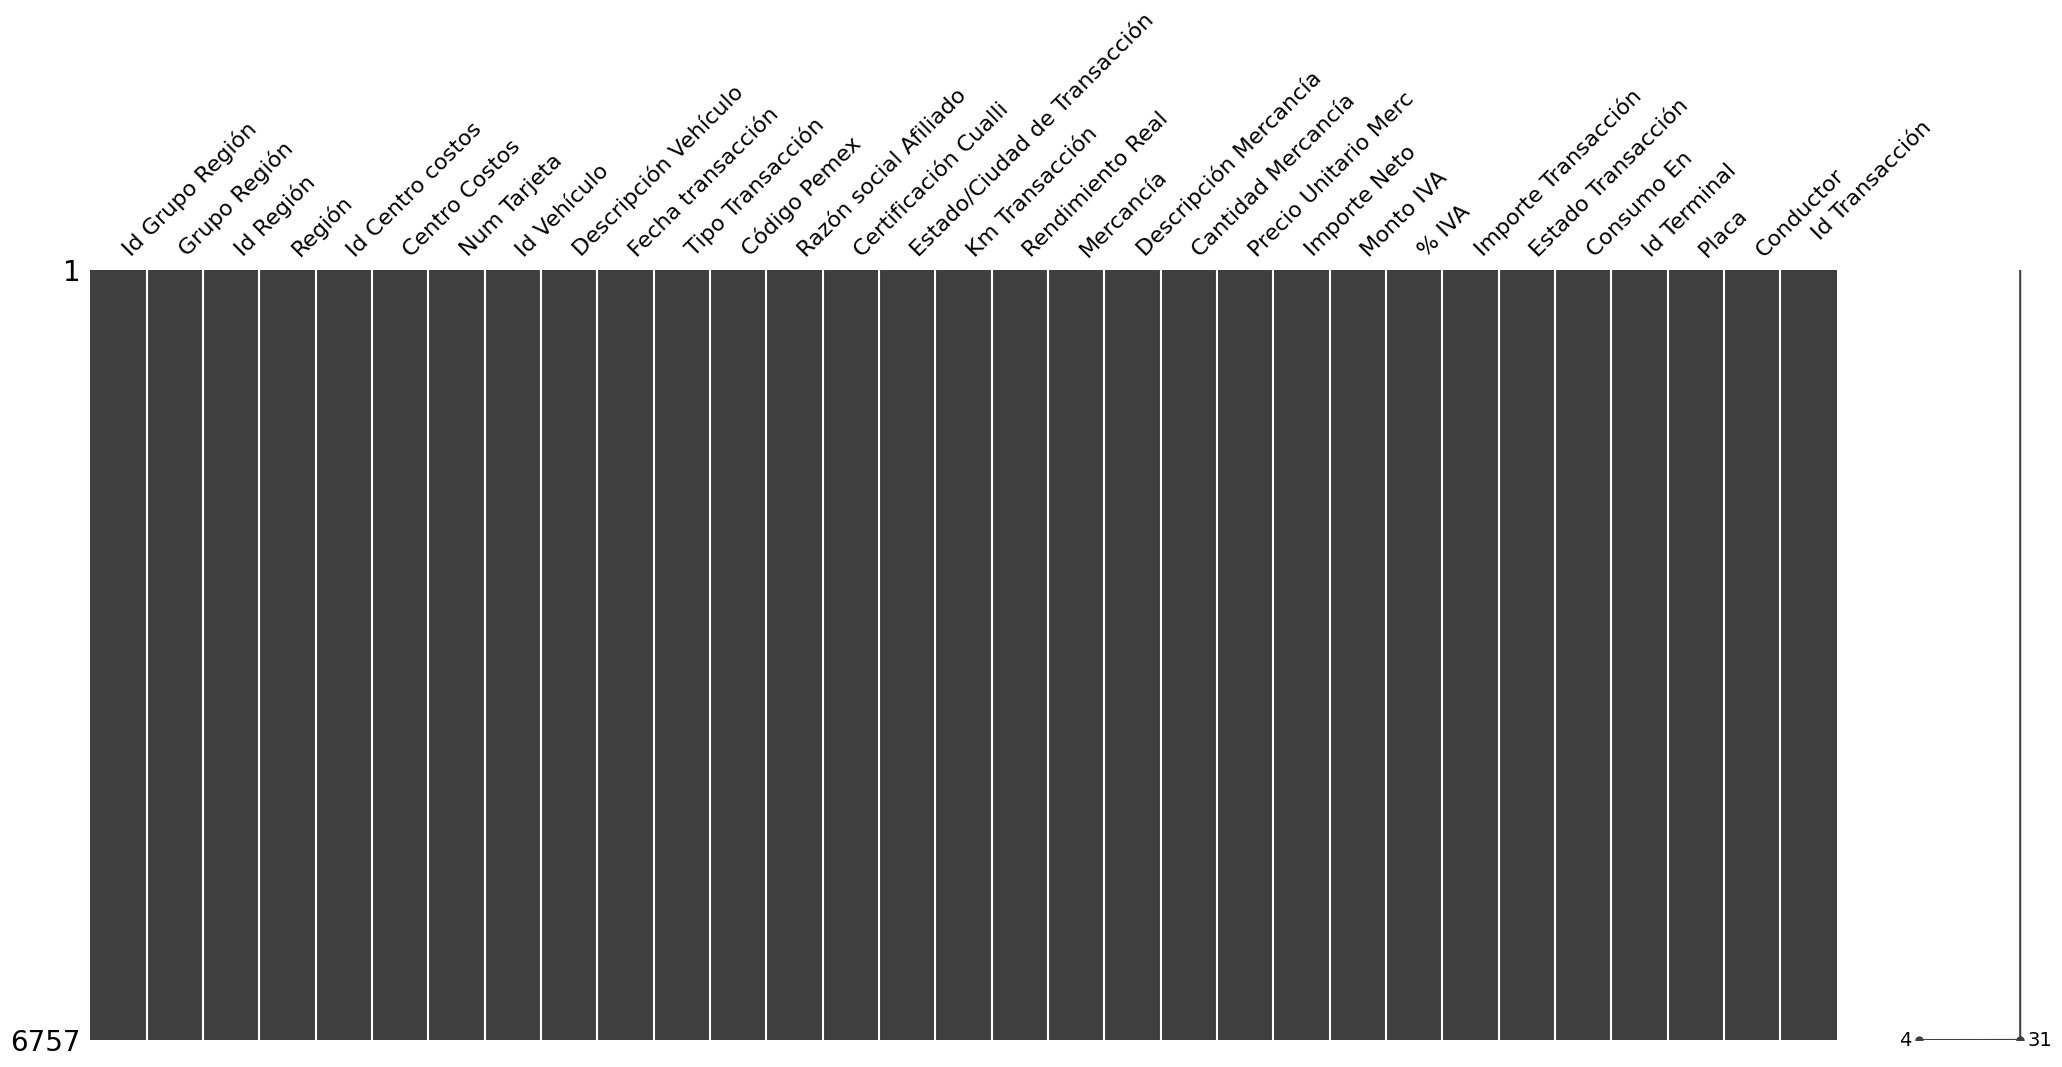

In [114]:
msno.matrix(ag_combustible)

In [115]:
# Límite máximo permitido de valores vacíos
limite_vacios = 0.65

#Calcular el porcentaje de valores vacíos por columna
porcentaje_vacios = sept_combustible.isna().mean()

#Identificar las columnas que se pasan del límite
quitar_columnas = porcentaje_vacios[porcentaje_vacios > limite_vacios].index

# Mostrar cuántas columnas hay antes de quitar
print("Columnas antes de quitar:", sept_combustible.shape[1])

#Quitar las columnas con demasiados vacíos
sept_combustible = sept_combustible.drop(columns=quitar_columnas)

#Resultados finales
print("Columnas quitadas:", list(quitar_columnas))
print("Columnas después de quitar:", sept_combustible.shape[1])

Columnas antes de quitar: 48
Columnas quitadas: ['No Comprobante', 'Ticket de Bomba', 'Km Ant Transacción', 'Recorrido', 'Rendimiento Vehículo', 'Capacidad de Tanque', 'Saldo Ant Transacción', 'Saldo Actual Después de Transacción', 'TAR', 'Monto descuento', 'Tipo Tarjeta', 'Observaciones', 'Parámetro Personalizado1', 'Parámetro Personalizado2', 'Parámetro Personalizado3', 'Parámetro Personalizado4\n', 'Parámetro Personalizado5']
Columnas después de quitar: 31


<Axes: >

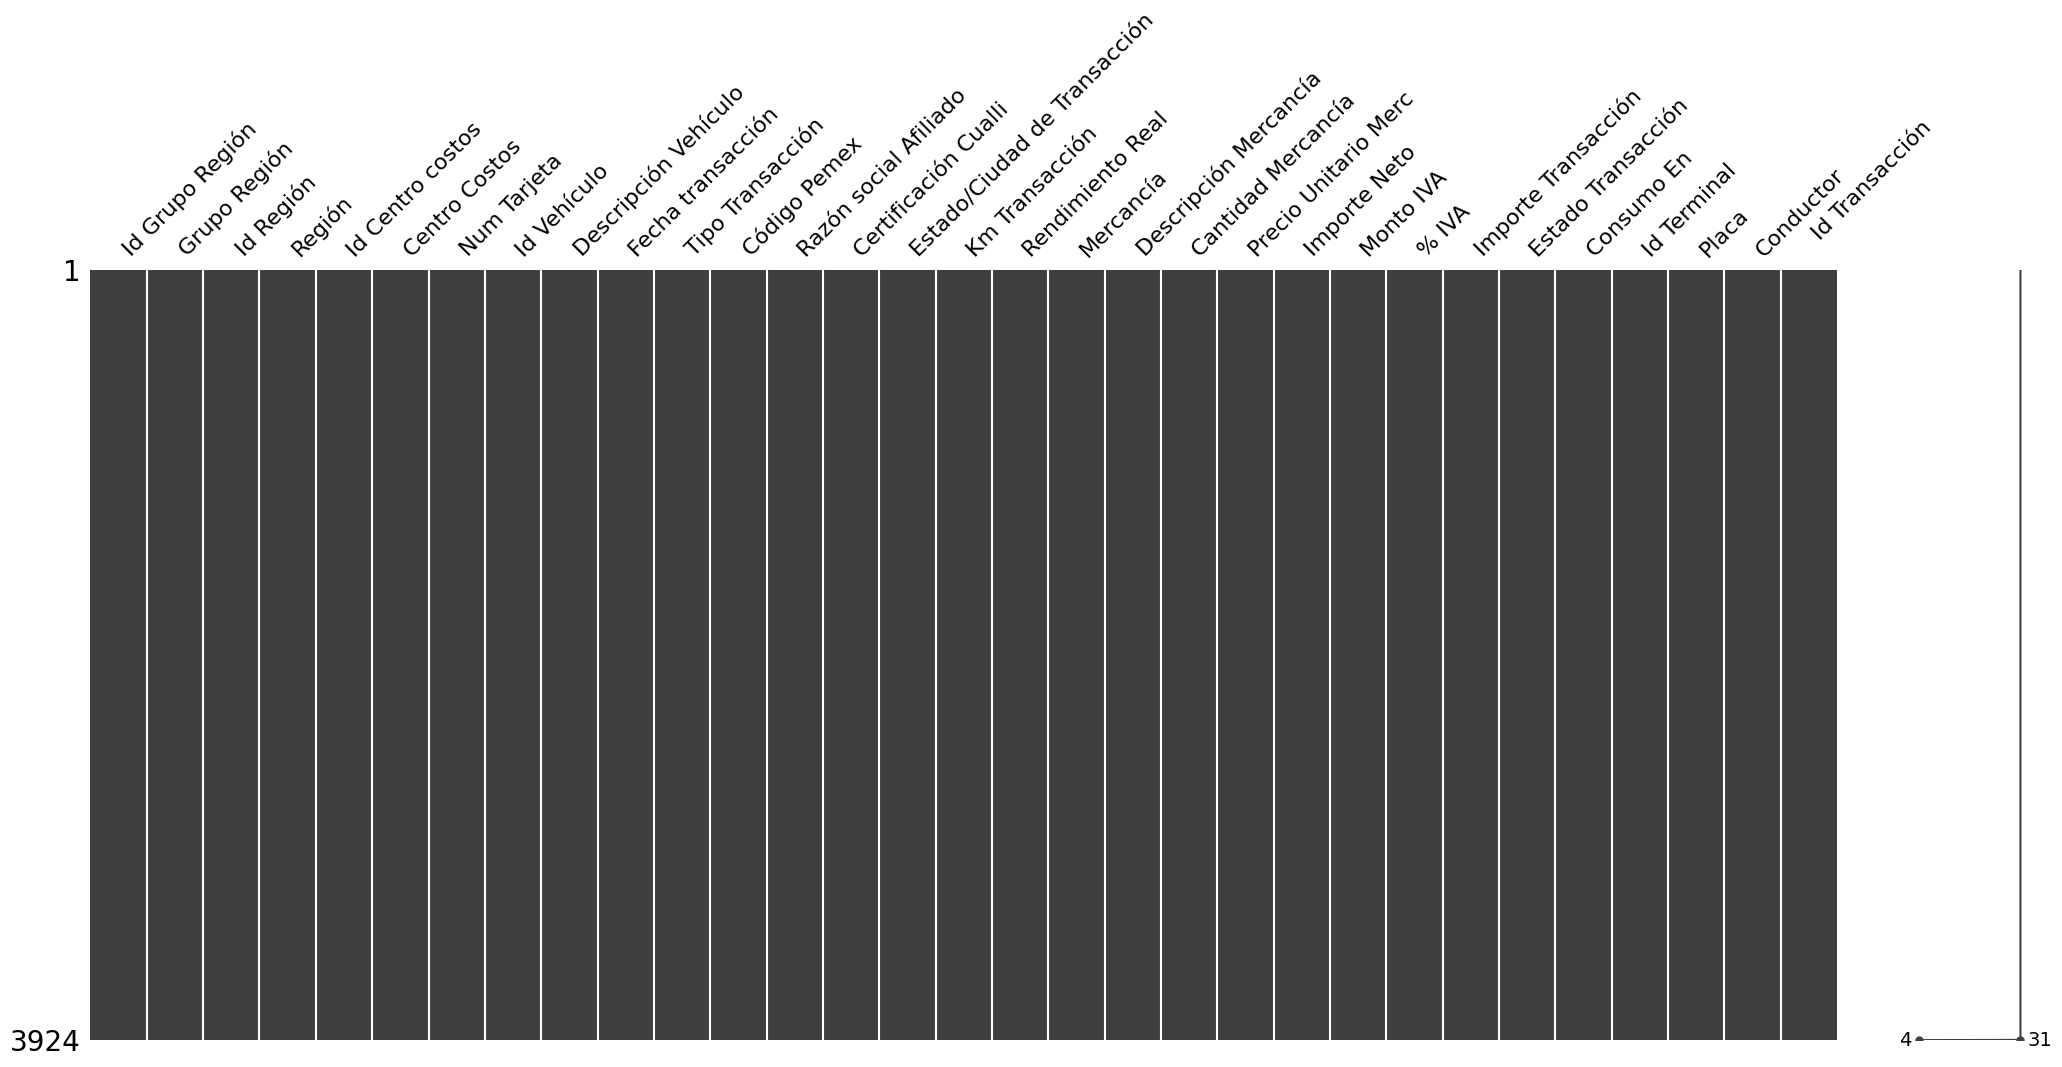

In [116]:
msno.matrix(sept_combustible)

In [117]:
print(f"\nForma de peajes antes de eliminar nulos: {peajes.shape}")
peajes.dropna(inplace=True)
print(f"Forma de peajes después de eliminar nulos: {peajes.shape}")


Forma de peajes antes de eliminar nulos: (187036, 11)
Forma de peajes después de eliminar nulos: (181245, 11)


<Axes: >

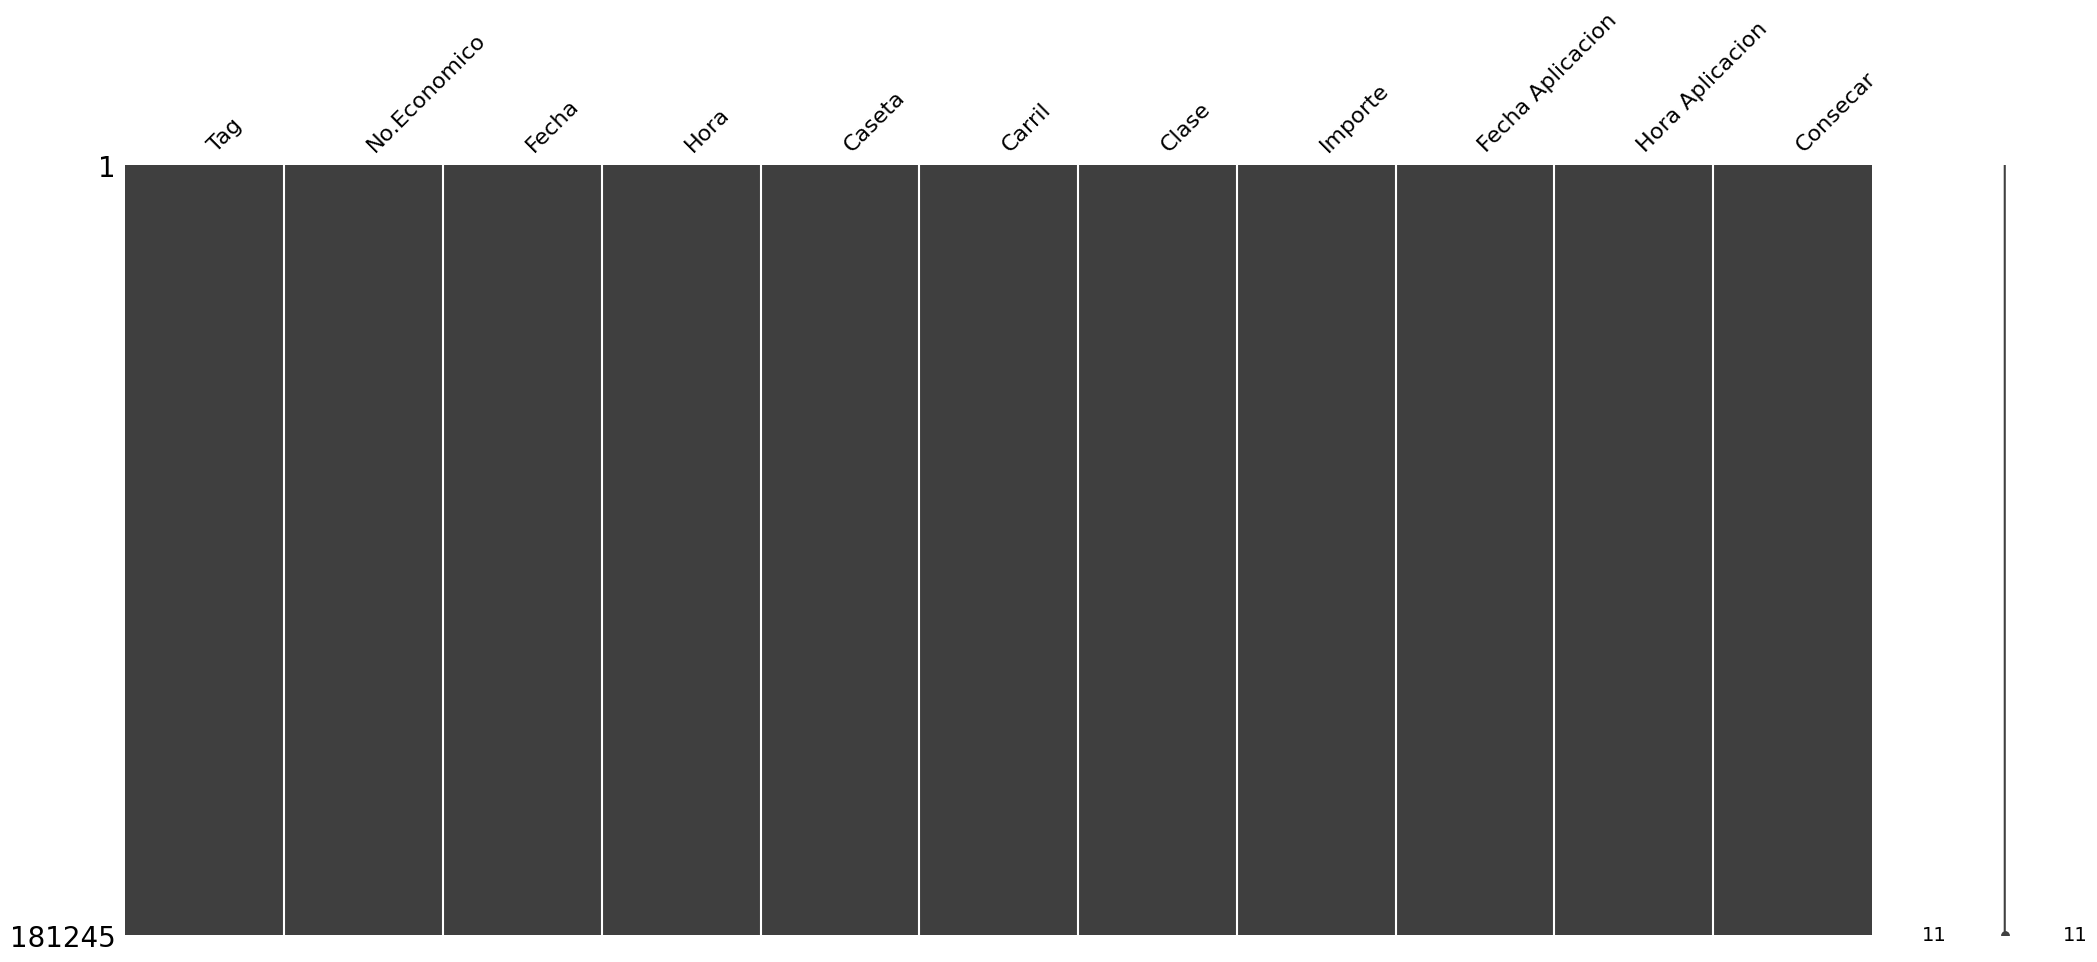

In [118]:
msno.matrix(peajes)

In [119]:
# Límite máximo permitido de valores vacíos
limite_vacios = 0.65

#Calcular el porcentaje de valores vacíos por columna
porcentaje_vacios = viajes.isna().mean()

#Identificar las columnas que se pasan del límite
quitar_columnas = porcentaje_vacios[porcentaje_vacios > limite_vacios].index

# Mostrar cuántas columnas hay antes de quitar
print("Columnas antes de quitar:", viajes.shape[1])

#Quitar las columnas con demasiados vacíos
viajes = viajes.drop(columns=quitar_columnas)

#Resultados finales
print("Columnas quitadas:", list(quitar_columnas))
print("Columnas después de quitar:", viajes.shape[1])

Columnas antes de quitar: 32
Columnas quitadas: ['Dolly', 'Peso Descarga Kgs', 'Documentos', 'UUID CP']
Columnas después de quitar: 28


In [120]:
print(f"Forma de 'viajes' antes de eliminar nulos en columnas específicas: {viajes.shape}")

columns_to_check = [
    'Factura',
    'Fecha.1',
    'Fecha Vencimiento',
    'Tractocamión',
    'Nro Ope',
    'Operador',
    'Estatus de Viaje'
]

# Eliminar filas donde hay nulos en las columnas especificadas
viajes.dropna(subset=columns_to_check, inplace=True)

print(f"Forma de 'viajes' después de eliminar nulos en columnas específicas: {viajes.shape}")

Forma de 'viajes' antes de eliminar nulos en columnas específicas: (108991, 28)
Forma de 'viajes' después de eliminar nulos en columnas específicas: (104728, 28)


In [121]:
# Quitar columnas que no son relevantes y contienen nulos
viajes = viajes.drop(columns=['Remolque 1', 'Remolque 2', 'Diferencia', 'Fecha.1', 'Peso Kgs'])

Ya que necesitamos las columnas `Fecha Salida` y `Fecha LLegada` para el cálculo de variabilidad de las rutas y no podemos imputar datos datetime, vamos a eliminar las filas que no tienen estos datos.

In [122]:
null_percentage_salida = viajes['Fecha Salida'].isnull().mean() * 100
null_percentage_llegada = viajes['Fecha Llegada'].isnull().mean() * 100

print(f"Porcentaje de nulos en 'Fecha Salida': {null_percentage_salida:.2f}%")
print(f"Porcentaje de nulos en 'Fecha Llegada': {null_percentage_llegada:.2f}%")

Porcentaje de nulos en 'Fecha Salida': 21.71%
Porcentaje de nulos en 'Fecha Llegada': 21.74%


In [123]:
print(f"Forma de viajes antes de eliminar filas sin 'Fecha Salida' o 'Fecha Llegada': {viajes.shape}")
viajes.dropna(subset=['Fecha Salida', 'Fecha Llegada'], inplace=True)
print(f"Forma de viajes después de eliminar filas sin 'Fecha Salida' o 'Fecha Llegada': {viajes.shape}")

Forma de viajes antes de eliminar filas sin 'Fecha Salida' o 'Fecha Llegada': (104728, 23)
Forma de viajes después de eliminar filas sin 'Fecha Salida' o 'Fecha Llegada': (81956, 23)


Evaluamos los datos estadísticos de la columna `Liquidación` para evaluar la mejora estrategia de imputación de los datos restantes.

In [124]:
null_percentage_liquidacion = viajes['Liquidación'].isnull().mean() * 100
print(f"Porcentaje de nulos en 'Liquidación': {null_percentage_liquidacion:.2f}%")

display(viajes['Liquidación'].describe())

Porcentaje de nulos en 'Liquidación': 11.95%


,Liquidación
count,7.216500e+04
mean,1.240516e+07
std,3.530503e+08
min,1.000000e+00
25%,5.890000e+03
50%,9.907000e+03
75%,1.383200e+04
max,1.726102e+10


Identificamos que es una columna con una gran skewness ya que existe un gran rango y una diferencia significativa entre la media y la mediana, por lo que nuestra mejor estrategia es imputar con la mediana.

In [125]:
median_liquidacion = viajes['Liquidación'].median()

# Imputamos con la mediana
viajes['Liquidación'] = viajes['Liquidación'].fillna(median_liquidacion)

print(f"Valores nulos en 'Liquidación' después de la imputación: {viajes['Liquidación'].isnull().sum()}")
print(f"Mediana utilizada para la imputación: {median_liquidacion}")

Valores nulos en 'Liquidación' después de la imputación: 0
Mediana utilizada para la imputación: 9907.0


<Axes: >

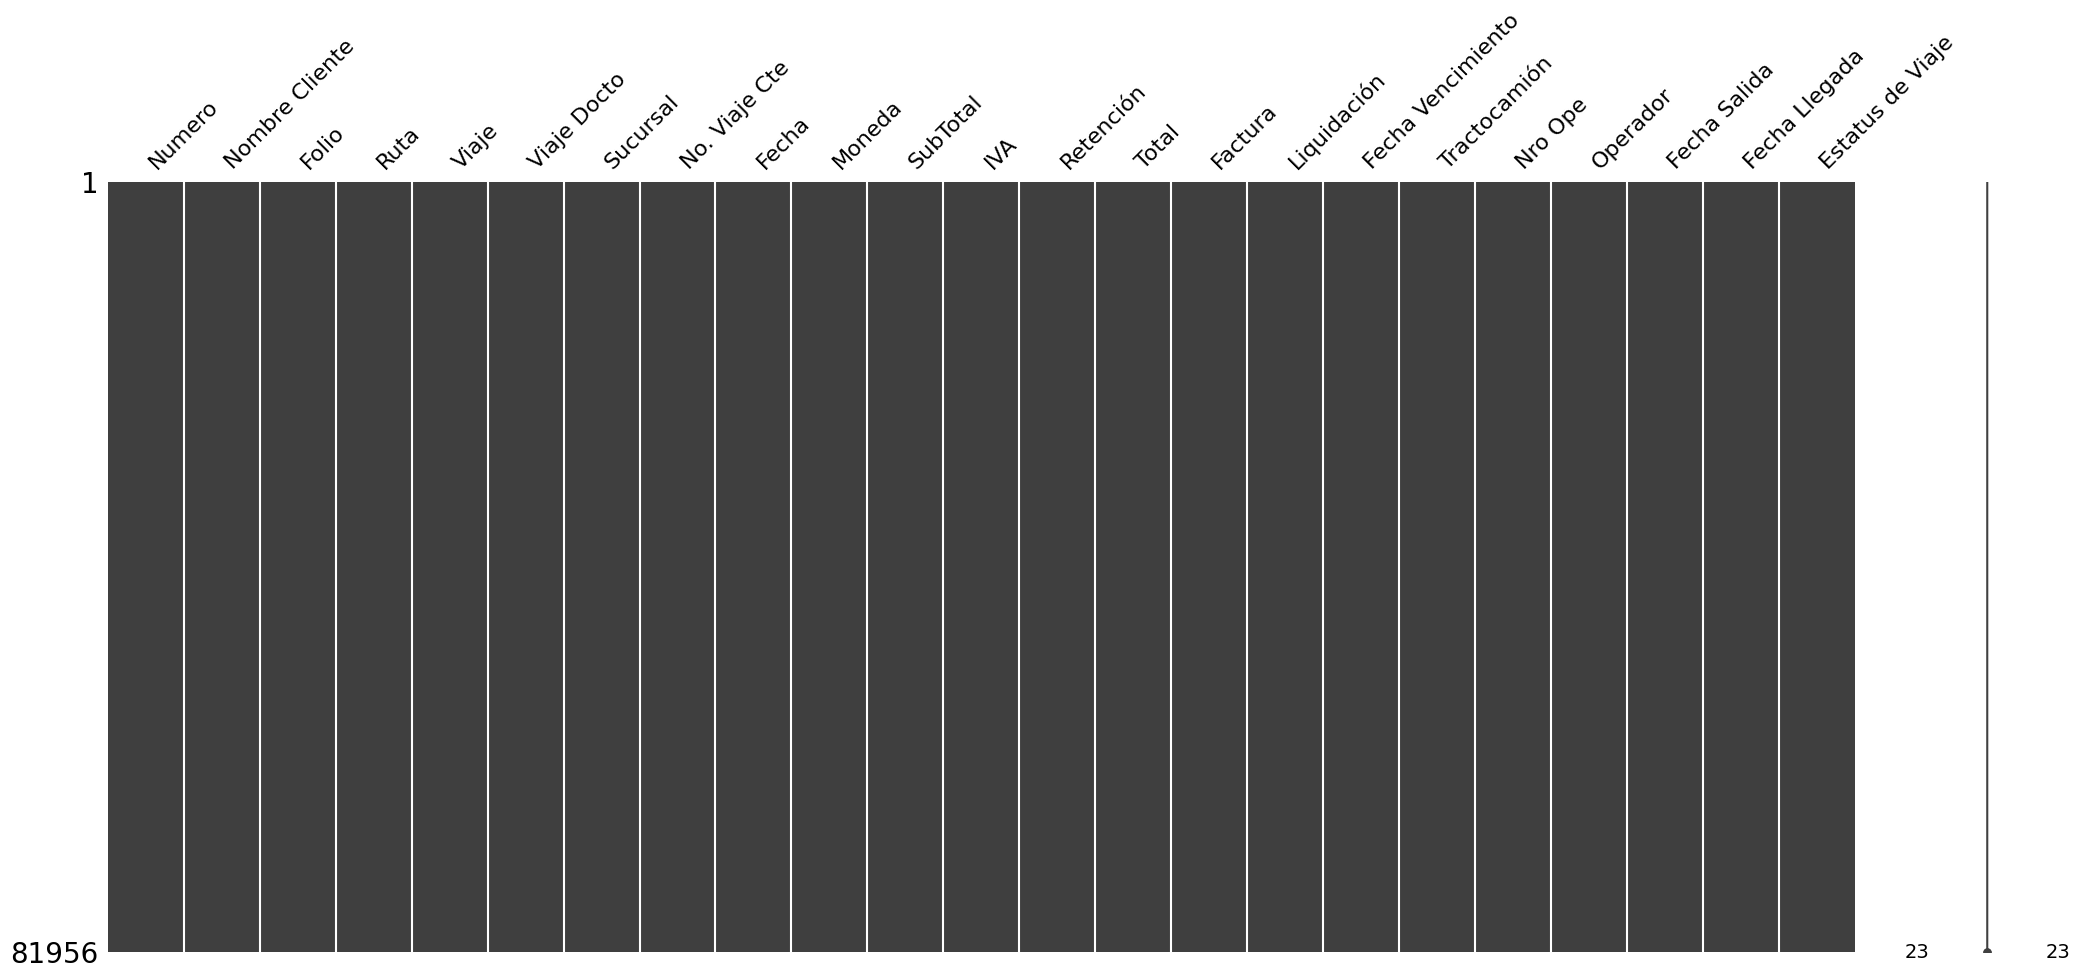

In [126]:
msno.matrix(viajes)

#### **Formato de las Columnas**

Combinamos todos los datos de combustible, en distintos dataframes, en un solo dataframe general.

In [127]:
combustibles = pd.concat([ag_combustible, enfeb_combustible, sept_combustible], ignore_index=True)


Limpiamos los nombres de las columnas para quitar trailing whitespace o irregularidades en el formato.

In [128]:
telemetria_report.columns = telemetria_report.columns.str.strip()
combustibles.columns = combustibles.columns.str.strip()
peajes.columns = peajes.columns.str.strip()
viajes.columns = viajes.columns.str.strip()

Quitamos las unidades cuyos nombres no empiezan con T ya que estas no nos interesan al ser para movimientos internos.

In [129]:
telemetria_report = telemetria_report[telemetria_report['Nombre'].str.startswith('T', na=False)]
telemetria_summary = telemetria_summary[telemetria_summary['Nombre'].str.startswith('T', na=False)]

Aseguramos que las columnas datetime tengan el formato correcto.

In [130]:
viajes['Fecha'] = pd.to_datetime(viajes['Fecha'], errors='coerce')

In [131]:
viajes['Fecha Salida'] = pd.to_datetime(viajes['Fecha Salida'], errors='coerce')
viajes['Fecha Llegada'] = pd.to_datetime(viajes['Fecha Llegada'], errors='coerce')

In [132]:
combustibles["Fecha transacción"] = pd.to_datetime(combustibles["Fecha transacción"], errors="coerce")
telemetria_report["Fecha de inicio del periodo"] = pd.to_datetime(telemetria_report["Fecha de inicio del periodo"], errors="coerce")

In [133]:
telemetria_report['Fecha_inicio'] = pd.to_datetime(telemetria_report['Fecha de inicio del periodo'])
telemetria_report['Fecha_fin'] = pd.to_datetime(telemetria_report['Fecha de fin del periodo'])

#### **Manejo de Duplicados**

In [134]:
print(f"Forma de viajes antes de eliminar duplicados: {viajes.shape}")
viajes.drop_duplicates(inplace=True)
print(f"Forma de viajes después de eliminar duplicados: {viajes.shape}")

Forma de viajes antes de eliminar duplicados: (81956, 23)
Forma de viajes después de eliminar duplicados: (81955, 23)


In [135]:
combustibles.duplicated().sum()

np.int64(0)

In [136]:
telemetria_report.duplicated().sum()

np.int64(9)

In [137]:
print(f"Forma de telemetria_report antes de eliminar duplicados: {telemetria_report.shape}")
telemetria_report.drop_duplicates(inplace=True)
print(f"Forma de telemetria_report después de eliminar duplicados: {telemetria_report.shape}")

Forma de telemetria_report antes de eliminar duplicados: (7541, 12)
Forma de telemetria_report después de eliminar duplicados: (7532, 12)


In [138]:
telemetria_summary.duplicated().sum()

np.int64(0)

In [139]:
peajes.duplicated().sum()

np.int64(0)

##**3. Extracción de Datos Limpios**

In [141]:
peajes.to_csv("peajes_clean.csv", index=False)
telemetria_report.to_csv("telemetria_report_clean.csv", index=False)
telemetria_summary.to_csv("telemetria_summary_clean.csv", index=False)
viajes.to_csv("viajes_clean.csv", index=False)
combustibles.to_csv("combustibles_clean.csv", index=False)